# Neural Network

Uma rede neural consiste em unidades (neurônios), organizadas em camadas, que convertem um vetor de entrada em alguma saída. Cada unidade recebe uma entrada, aplica uma função (geralmente não linear) a ela e depois passa a saída para a próxima camada. 
A saída da unidade alimenta todas as unidades na próxima camada, mas não há feedback para a camada anterior.  


Nesse exemplo foi usado o MLPClassifier que treina iterativamente uma vez que, a cada passo de tempo, as derivadas 
parciais da função de perda em relação aos parâmetros do modelo são calculadas para atualizar os parâmetros.  

Na estrutura unidirecional (feedforward), todas as saídas dos neurônios de uma camada são conectadas com todos os neurônios da camada posterior obedecendo à direção entrada => saída, sem conexões entre neurônios de uma mesma camada.

![exemplo](https://www.monolitonimbus.com.br/wp-content/uploads/2017/05/neuronios_rna.gif)


**Hiperparâmetros:**

- hidden_layer_sizes - Número de neurônios na camada oculta
- max_iter - Número máximo de iterações
- alpha - Termo de regularização
- solver - Otimizador baseado em gradiente estocástico proposto por Kingma, Diederik e Jimmy Ba
- verbose - Se deve imprimir mensagens de progresso.
- tol - Ponto de convergência
- random_state - Gerador de números aleatórios
- learning_rate_init - Taxa de aprendizado constante dada por.  

## Biblioteca e dados

In [10]:
from sklearn.neural_network import MLPClassifier
from load_and_prepare_data import load_and_prepare_data
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn


import time

y_column = 'lettr'
x_columns = ['x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
columns = [y_column] + x_columns

def load_and_prepare_data(training_set_number=16000):
    data = 'data_set/letter-recognition.data'
    df = pd.read_csv(data, names = columns)
    if training_set_number > len(df):
        training_set_number = int(0.75 * len(df))

    letters = np.unique(df.iloc[:, 0])
    labelencoder_df = preprocessing.LabelEncoder()
    

    train=df.iloc[:training_set_number]
    test=df[training_set_number:]


    x_train = train.iloc[:, 1:].values
    x_test = test.iloc[:, 1:].values
    y_train = train[y_column].values
    y_test = test[y_column].values
    return x_train, x_test, y_train, y_test

# Divide os dados em conjunto de treinamento e em conjunto de teste
features_train, features_test, letter_train, letter_test = load_and_prepare_data()




## Treinamento

In [11]:
start = time.time()

# Treinamento
mlpc = MLPClassifier(hidden_layer_sizes=(2000,), # Número de neurônios na camada oculta
                     #max_iter=3, # Número máximo de iterações
                     alpha=1e-5, # Termo de regularização
                    solver='adam', # Otimizador baseado em gradiente estocástico proposto por Kingma, Diederik e Jimmy Ba
                     verbose=1, # Se deve imprimir mensagens de progresso.
                     tol=1e-4, # Ponto de convergência
                     random_state=0, # Gerador de números aleatórios
                    learning_rate_init=.001) # Taxa de aprendizado constante dada por



mlpc.fit(features_train, letter_train).predict(features_test)


Iteration 1, loss = 1.69436319
Iteration 2, loss = 1.03508149
Iteration 3, loss = 0.88314122
Iteration 4, loss = 0.76971291
Iteration 5, loss = 0.69135538
Iteration 6, loss = 0.62358481
Iteration 7, loss = 0.56863085
Iteration 8, loss = 0.52675672
Iteration 9, loss = 0.49276286
Iteration 10, loss = 0.44615678
Iteration 11, loss = 0.41884060
Iteration 12, loss = 0.38847118
Iteration 13, loss = 0.35787431
Iteration 14, loss = 0.34420762
Iteration 15, loss = 0.32290841
Iteration 16, loss = 0.31079079
Iteration 17, loss = 0.29543563
Iteration 18, loss = 0.28144752
Iteration 19, loss = 0.26495969
Iteration 20, loss = 0.25549006
Iteration 21, loss = 0.24352443
Iteration 22, loss = 0.23728427
Iteration 23, loss = 0.22300808
Iteration 24, loss = 0.21659838
Iteration 25, loss = 0.20890180
Iteration 26, loss = 0.20202439
Iteration 27, loss = 0.19670168
Iteration 28, loss = 0.19395220
Iteration 29, loss = 0.18126571
Iteration 30, loss = 0.17942591
Iteration 31, loss = 0.17272849
Iteration 32, los

array(['U', 'N', 'V', ..., 'T', 'S', 'A'], dtype='<U1')

## Duração do treino

In [12]:
end = time.time()
print ("Tempo total de treino{} ".format(end - start))

Tempo total de treino298.01090121269226 


## Acurácia

In [13]:
accuracy = mlpc.score(features_test, letter_test)
print(float(accuracy))

0.96525


## Relatório com precisão, recall e f1-score

In [14]:
predicted = mlpc.predict(features_test)
print((metrics.classification_report(letter_test, predicted)))

              precision    recall  f1-score   support

           A       1.00      0.97      0.99       156
           B       0.92      0.99      0.95       136
           C       0.97      0.99      0.98       142
           D       0.99      0.92      0.95       167
           E       0.99      0.93      0.96       152
           F       0.96      0.96      0.96       153
           G       0.97      0.96      0.97       164
           H       0.82      0.95      0.88       151
           I       0.98      0.97      0.97       165
           J       0.95      0.96      0.96       148
           K       0.93      0.97      0.95       146
           L       0.97      0.97      0.97       157
           M       0.98      0.99      0.99       144
           N       0.96      0.97      0.97       166
           O       0.99      0.92      0.96       139
           P       0.94      0.97      0.95       168
           Q       1.00      0.97      0.98       168
           R       0.95    

## Matriz de confusão

In [15]:
# Gera matriz de confusão
print(metrics.confusion_matrix(letter_test, predicted))

[[152   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   1   0]
 [  0 134   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0 140   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   1   0   0   0   0   0   0]
 [  0   3   0 154   0   0   0   9   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   4   0 142   0   3   0   0   0   1   1   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 147   0   1   0   0   0   0   0   0   0   4   0   0
    0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0 158   0   0   0   1   0   1   0   0   2   0   1
    0   0   0   0   1   0   0   0]
 [  0   1   0   0   0   0   1 143   0   0   1   0   0   3   0   1   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0 160   2   0   0   0   1   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [16]:
def confusion_matrix_plot(y_test, y_predict, letters):

    cnf_matrix = confusion_matrix(y_test, y_predict)        
    df_cm = pd.DataFrame(cnf_matrix, letters,
                      letters)
    sn.set(font_scale=1.0)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 10})# font size
    plt.show()

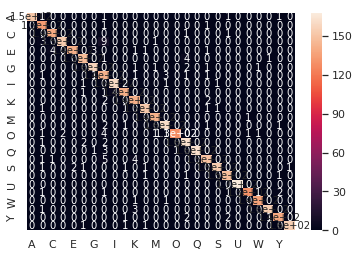

In [17]:
confusion_matrix_plot(letter_test, predicted, alfabeto)